<a href="https://www.kaggle.com/code/peacehegemony/the-dress?scriptVersionId=118694120" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Step 1: Importing necessary libraries

We'll begin by importing the necessary libraries for our analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



plt.rcParams["figure.figsize"] = [16, 9]
plt.rcParams["figure.dpi"] = 300

# Step 2: Loading the dataset

Next, we'll load the dataset into a pandas DataFrame. We'll also take a quick look at the first few rows to get a sense of the data.

In [2]:
# Load the dataset into a DataFrame
df = pd.read_csv('/kaggle/input/the-colors-of-the-iconic-dress/Hashtag-That-Dress-DFE.csv', encoding='latin-1')


# Take a look at the first few rows of the data
df.head()

,_unit_id,_created_at,_id,_started_at,_tainted,_channel,_trust,_worker_id,_country,_region,_city,_ip,color1,color2,you,processed_color_combo,what group?
0,683415253,2/27/15 20:01,1578428229,2/27/15 20:00,False,clixsense,0.3333,11477493,IND,2,Hyderabad,182.18.177.222,cyan,brown,I am a Night Owl. I prefer to be awake late at...,brown & cyan,NaN
1,683415253,2/27/15 20:01,1578428232,2/27/15 20:00,False,neodev,0.5556,31353544,VEN,NaN,NaN,190.201.116.194,white,gold,Both of the previous options apply well to who...,white & gold,white group
2,683415253,2/27/15 20:01,1578428236,2/27/15 20:00,False,clixsense,0.2778,29592447,BIH,1,Sarajevo,185.13.242.127,white,gold,Neither of the previous options apply well to ...,white & gold,white group
3,683415253,2/27/15 20:01,1578428308,2/27/15 20:00,False,getpaid,0.3333,30656104,MAR,49,Rabat,41.248.168.7,blue,black,I am a Night Owl. I prefer to be awake late at...,black & blue,blue group
4,683415253,2/27/15 20:01,1578428352,2/27/15 20:00,False,neodev,0.4444,31422367,SRB,0,Belgrade,93.86.138.220,black,blue,I am a Night Owl. I prefer to be awake late at...,black & blue,blue group


# Step 3: Exploratory Data Analysis

Now that we've loaded the dataset, we can perform some initial exploratory data analysis. We'll start by calculating summary statistics for each of the columns.

In [3]:
# Calculate summary statistics for the data
df.describe()

,_unit_id,_id,_trust,_worker_id
count,1015.0,1.015000e+03,1015.000000,1.015000e+03
mean,683415253.0,1.578436e+09,0.302558,2.593132e+07
std,0.0,6.410971e+03,0.108508,7.306949e+06
min,683415253.0,1.578428e+09,0.055000,4.690059e+06
25%,683415253.0,1.578430e+09,0.243000,2.178463e+07
50%,683415253.0,1.578434e+09,0.310300,2.978894e+07
75%,683415253.0,1.578441e+09,0.358300,3.115659e+07
max,683415253.0,1.578450e+09,1.000000,3.188563e+07


We can also create visualizations to understand the distribution of the data. For example, we can create a bar plot to see the distribution of responses for the color1 column.

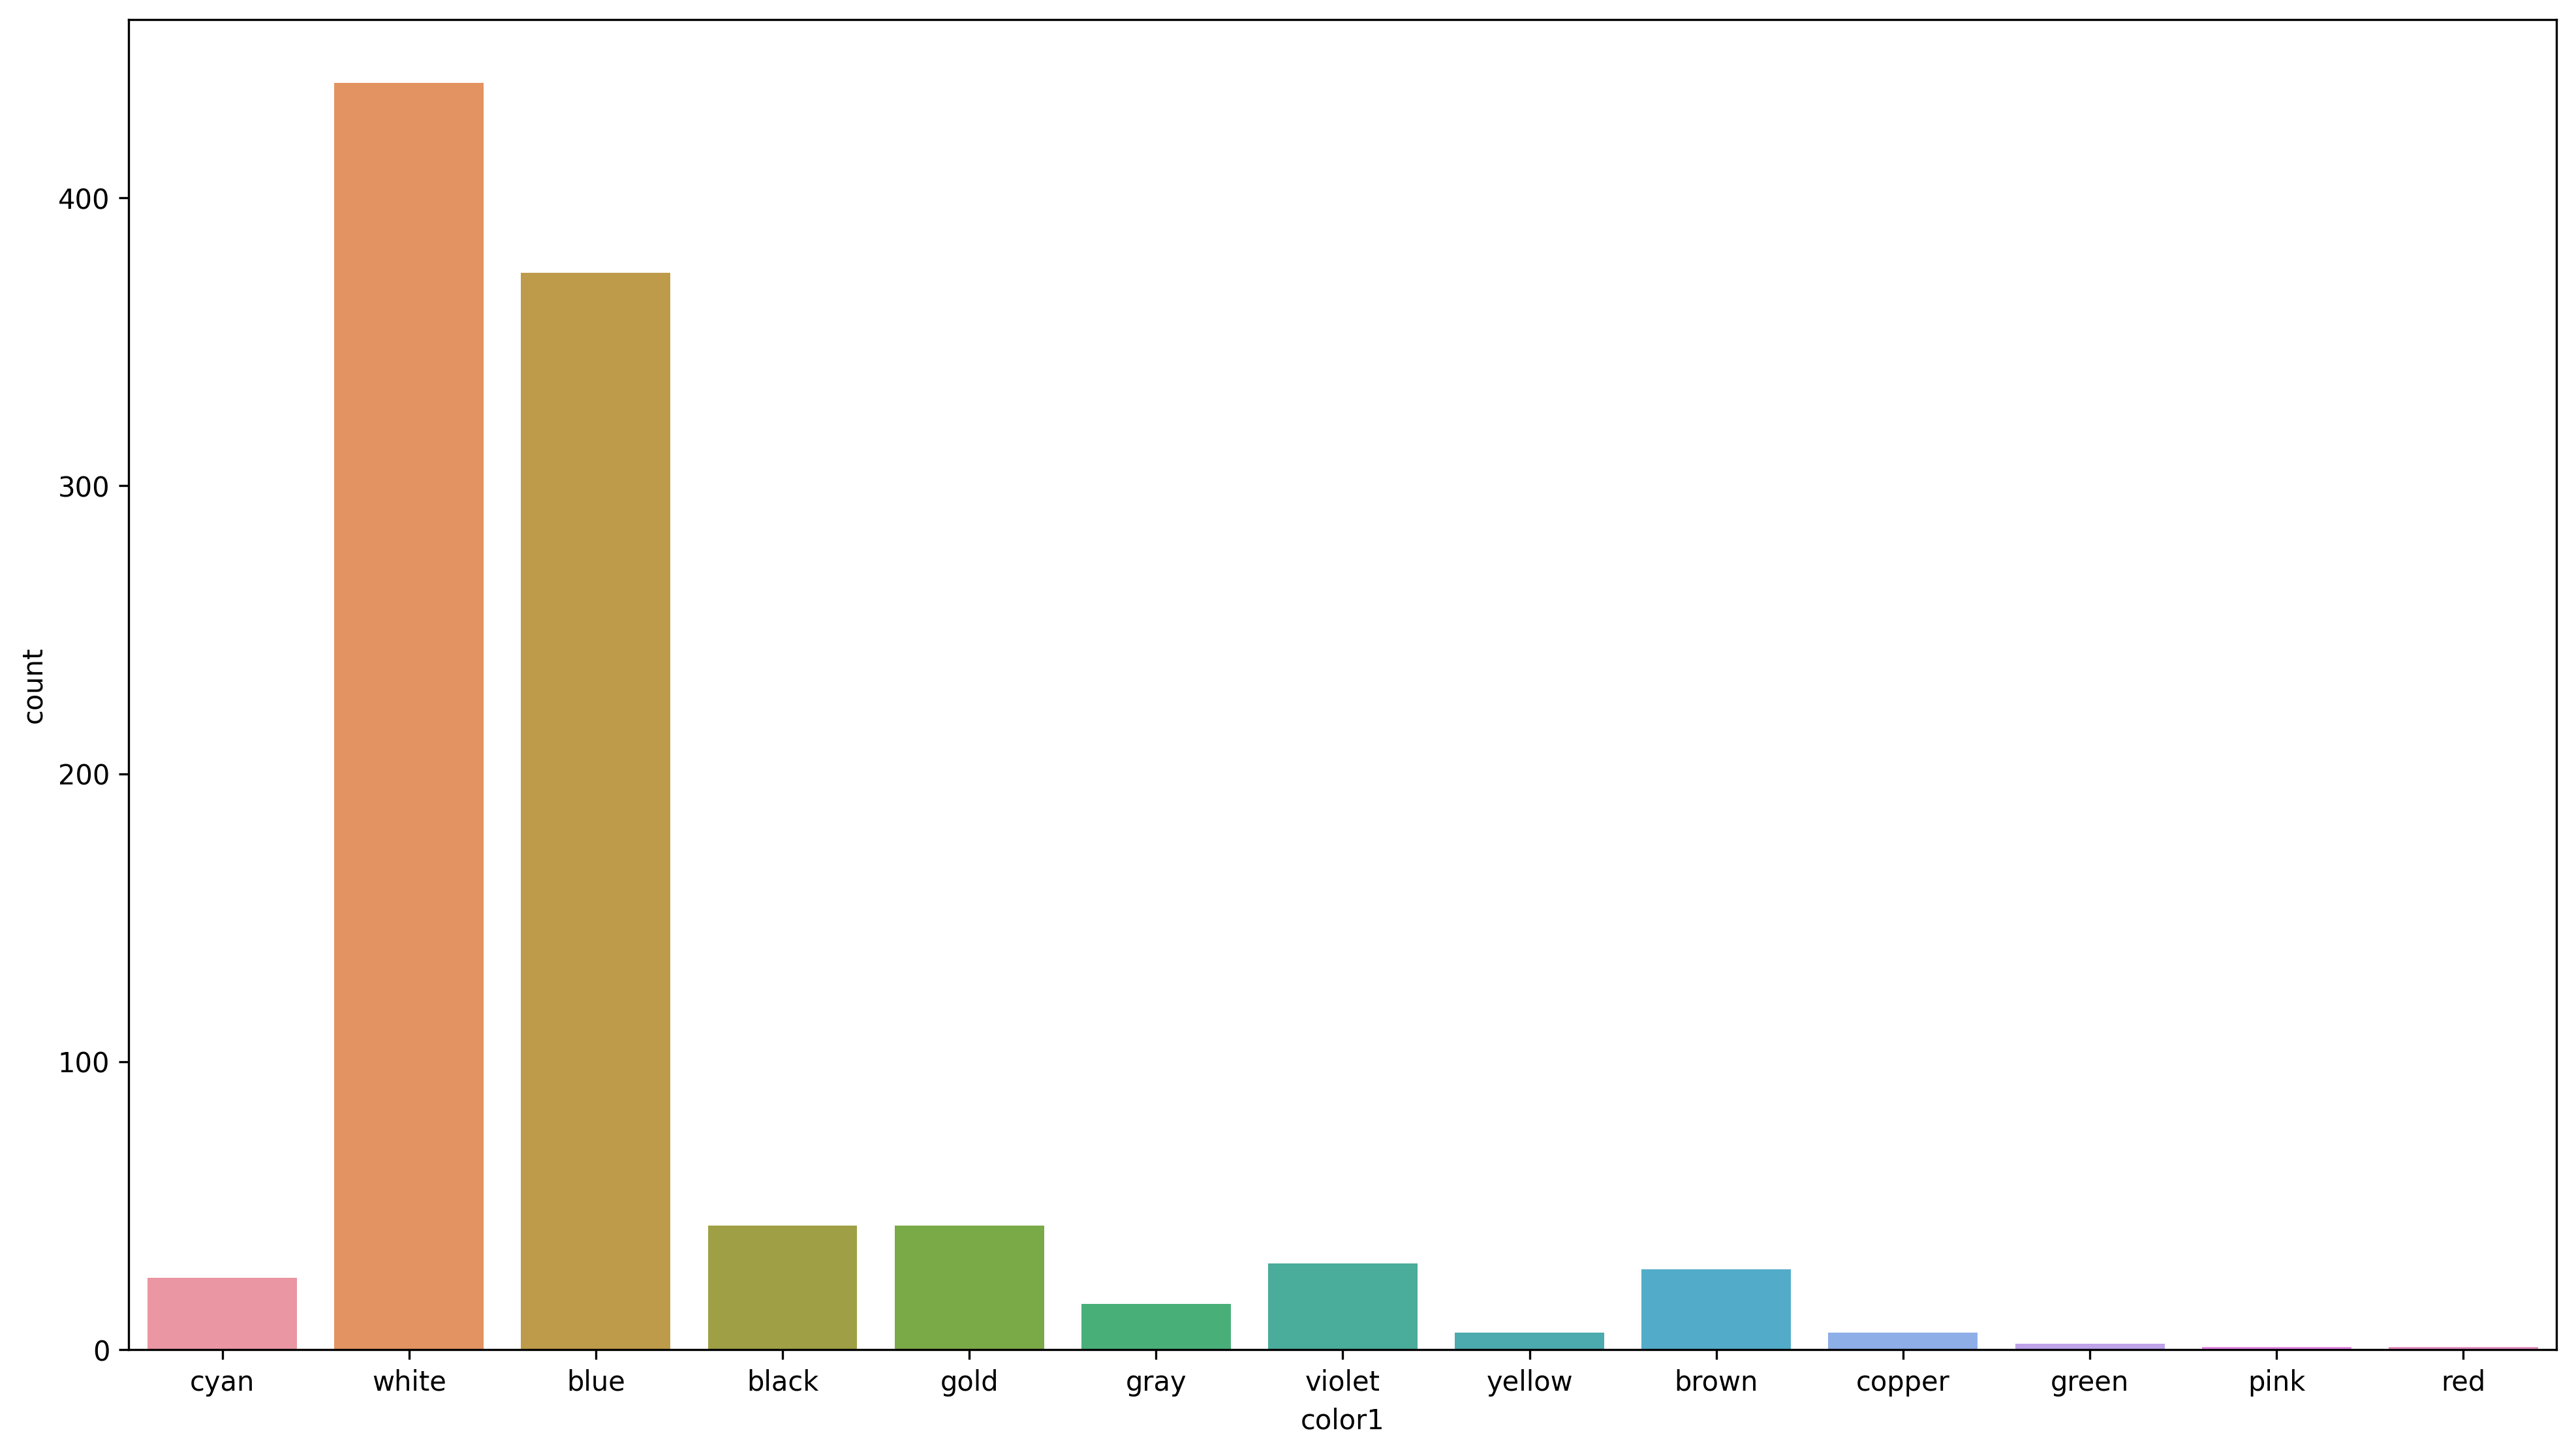

In [4]:
# Create a bar plot to see the distribution of responses for color1
sns.countplot(x = 'color1', data = df)
plt.show()

Next, we can check for any missing or incorrect values in the dataset.

In [5]:
# Check for missing values
df.isna().sum()

_unit_id                   0
_created_at                0
_id                        0
_started_at                0
_tainted                   0
_channel                   0
_trust                     0
_worker_id                 0
_country                   1
_region                  160
_city                    164
_ip                        0
color1                     0
color2                     0
you                        0
processed_color_combo      0
what group?               89
dtype: int64

# Step 4: Hypothesis Testing

We'll now look into the hypothesis that Night Owls and Morning People see the dress differently. We'll start by looking at the 'you' column and grouping the data by the 'what group' column.

In [6]:
# Group the data by 'what group'
grouped = df.groupby(['what group?'])


# Print the number of Night Owls and Morning People in each group
print(grouped['you'].value_counts())

what group?  you                                                             
blue group   I am a Night Owl. I prefer to be awake late at night.               208
             I am a Morning Person. I prefer to be awake early in the morning    111
             Both of the previous options apply well to who I am                  80
             Neither of the previous options apply well to who I am               42
white group  I am a Night Owl. I prefer to be awake late at night.               216
             I am a Morning Person. I prefer to be awake early in the morning    126
             Both of the previous options apply well to who I am                  97
             Neither of the previous options apply well to who I am               46
Name: you, dtype: int64


We can also create a visualization to compare the distribution of Night Owls and Morning People within each group.

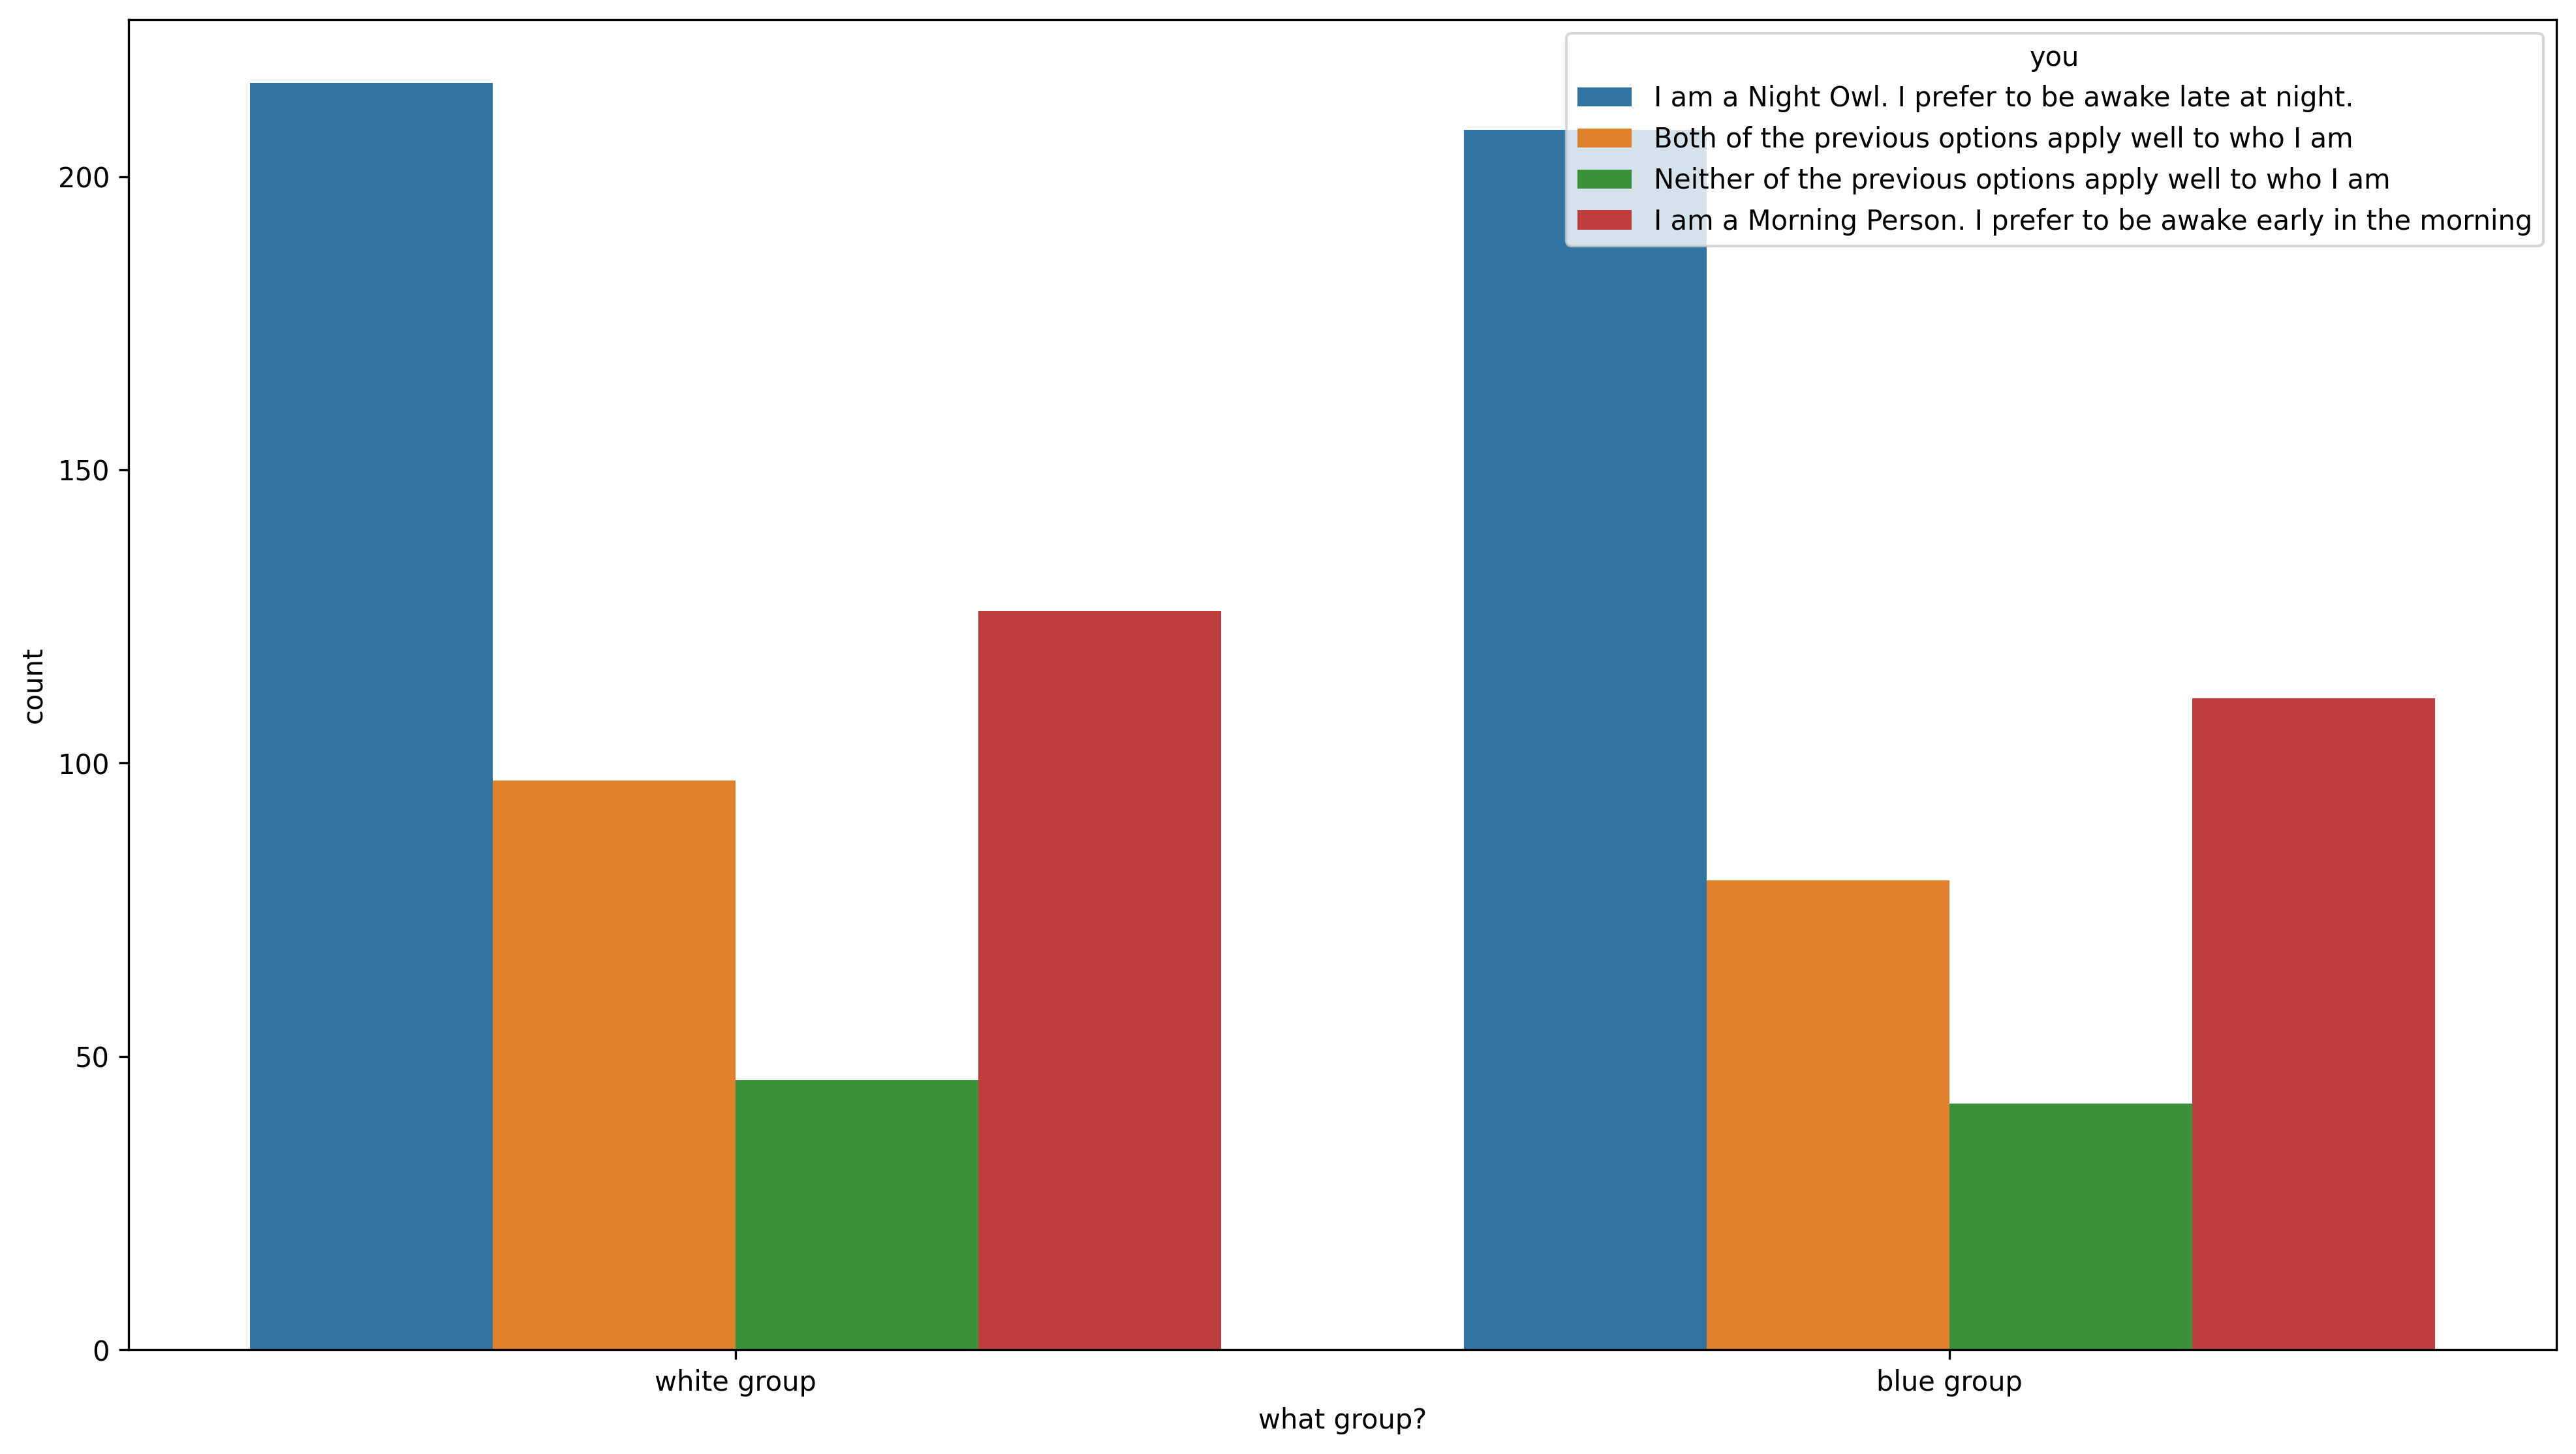

In [7]:
# Create a stacked bar plot to compare the distribution of Night Owls and Morning People within each group
sns.countplot(x = 'what group?', hue = 'you', data = df)

plt.show()

# Step 5: Location Analysis

We'll now explore the relationship between the worker's location and their response. We'll create visualizations to understand the distribution of responses by country, region, and city.

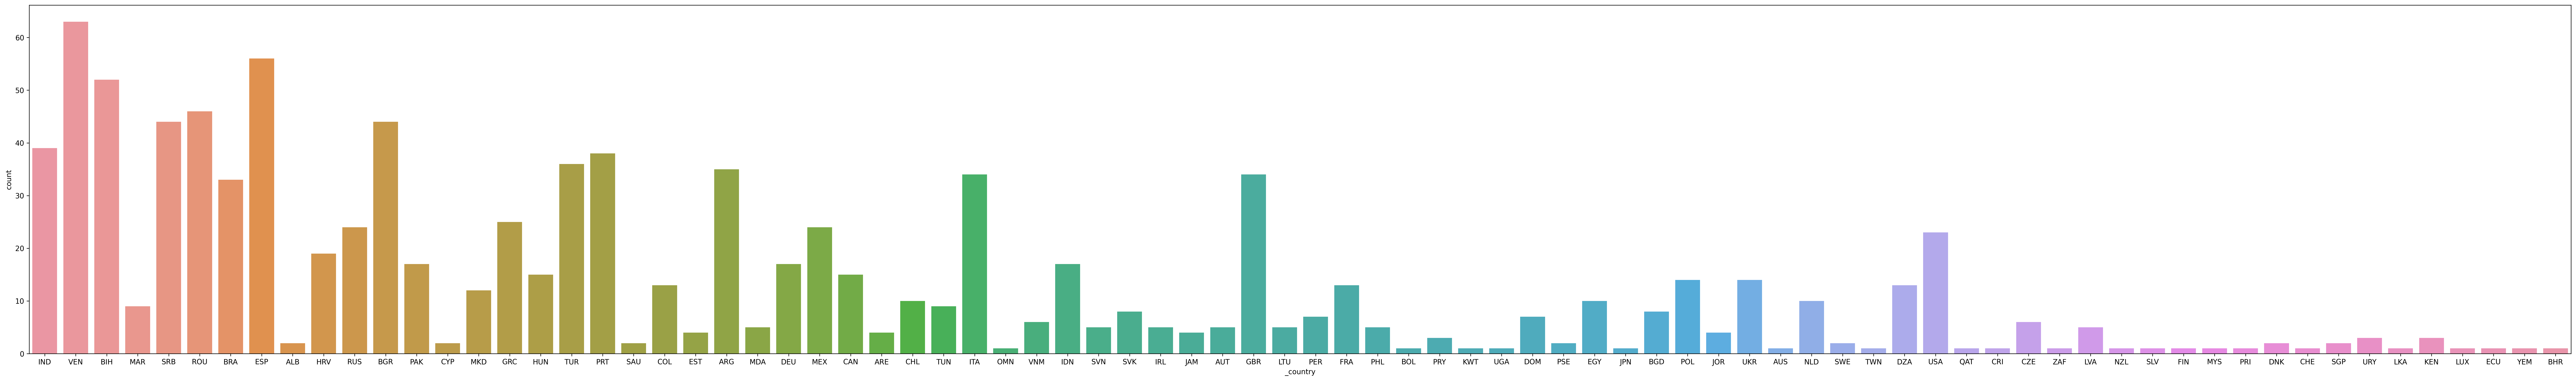

In [8]:
plt.figure(figsize = (64, 9), dpi = 300)


# Create a bar plot to see the distribution of responses by country
sns.countplot(x = '_country', data = df)

plt.show()

In [9]:
plt.figure(figsize = (96, 9), dpi = 300)


# Create a bar plot to see the distribution of responses by region
sns.countplot(x = '_region', data = df)

plt.show()

In [10]:
plt.figure(figsize = (128, 9), dpi = 300)


# Create a bar plot to see the distribution of responses by city
sns.countplot(x = '_city', data = df)

plt.show()

# Step 6: Trust Analysis

Finally, we'll explore the relationship between the worker's trust and their response. We'll create visualizations to understand the distribution of responses by trust.

(array([ 19.,  41.,  35.,  83.,  78., 134., 166., 200., 115.,  85.,  50.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   8.]),
 array([0.055 , 0.0928, 0.1306, 0.1684, 0.2062, 0.244 , 0.2818, 0.3196,
        0.3574, 0.3952, 0.433 , 0.4708, 0.5086, 0.5464, 0.5842, 0.622 ,
        0.6598, 0.6976, 0.7354, 0.7732, 0.811 , 0.8488, 0.8866, 0.9244,
        0.9622, 1.    ]),
 <BarContainer object of 25 artists>)

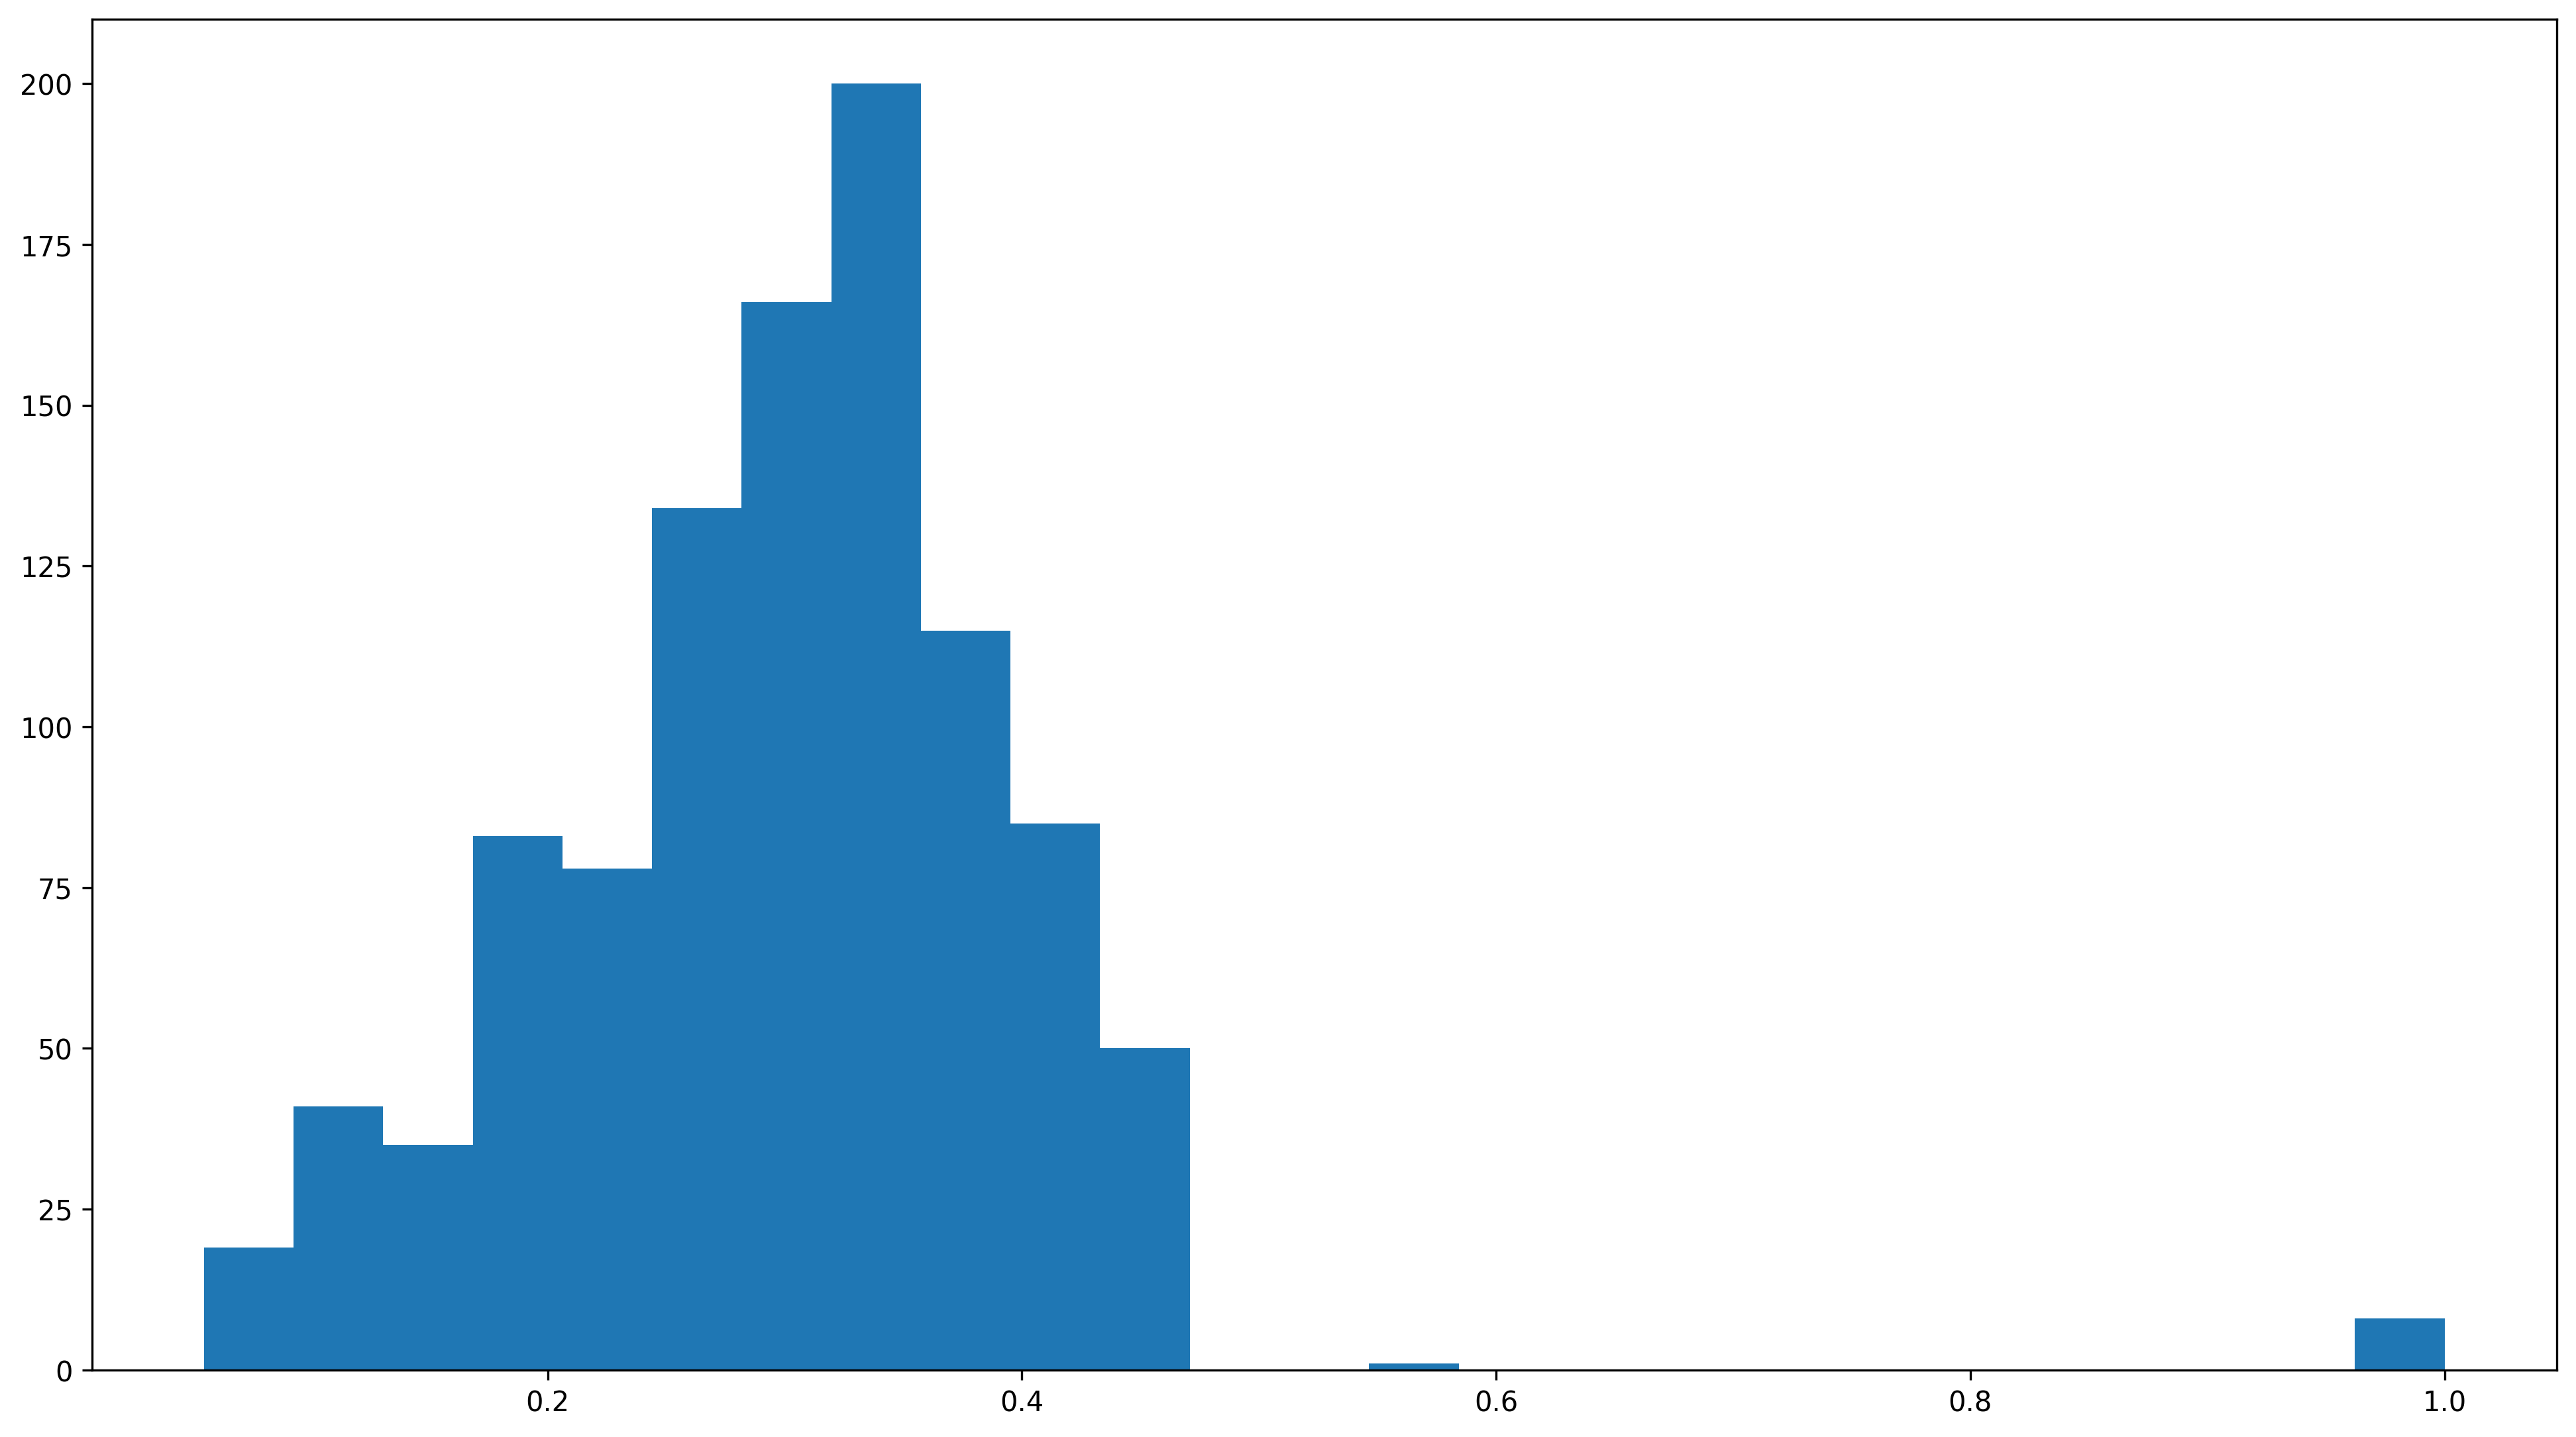

In [11]:
# Create a histogram to see the distribution of trust values
plt.hist(df['_trust'], bins = 25)

You can also group the data by trust and check the distribution of responses by trust

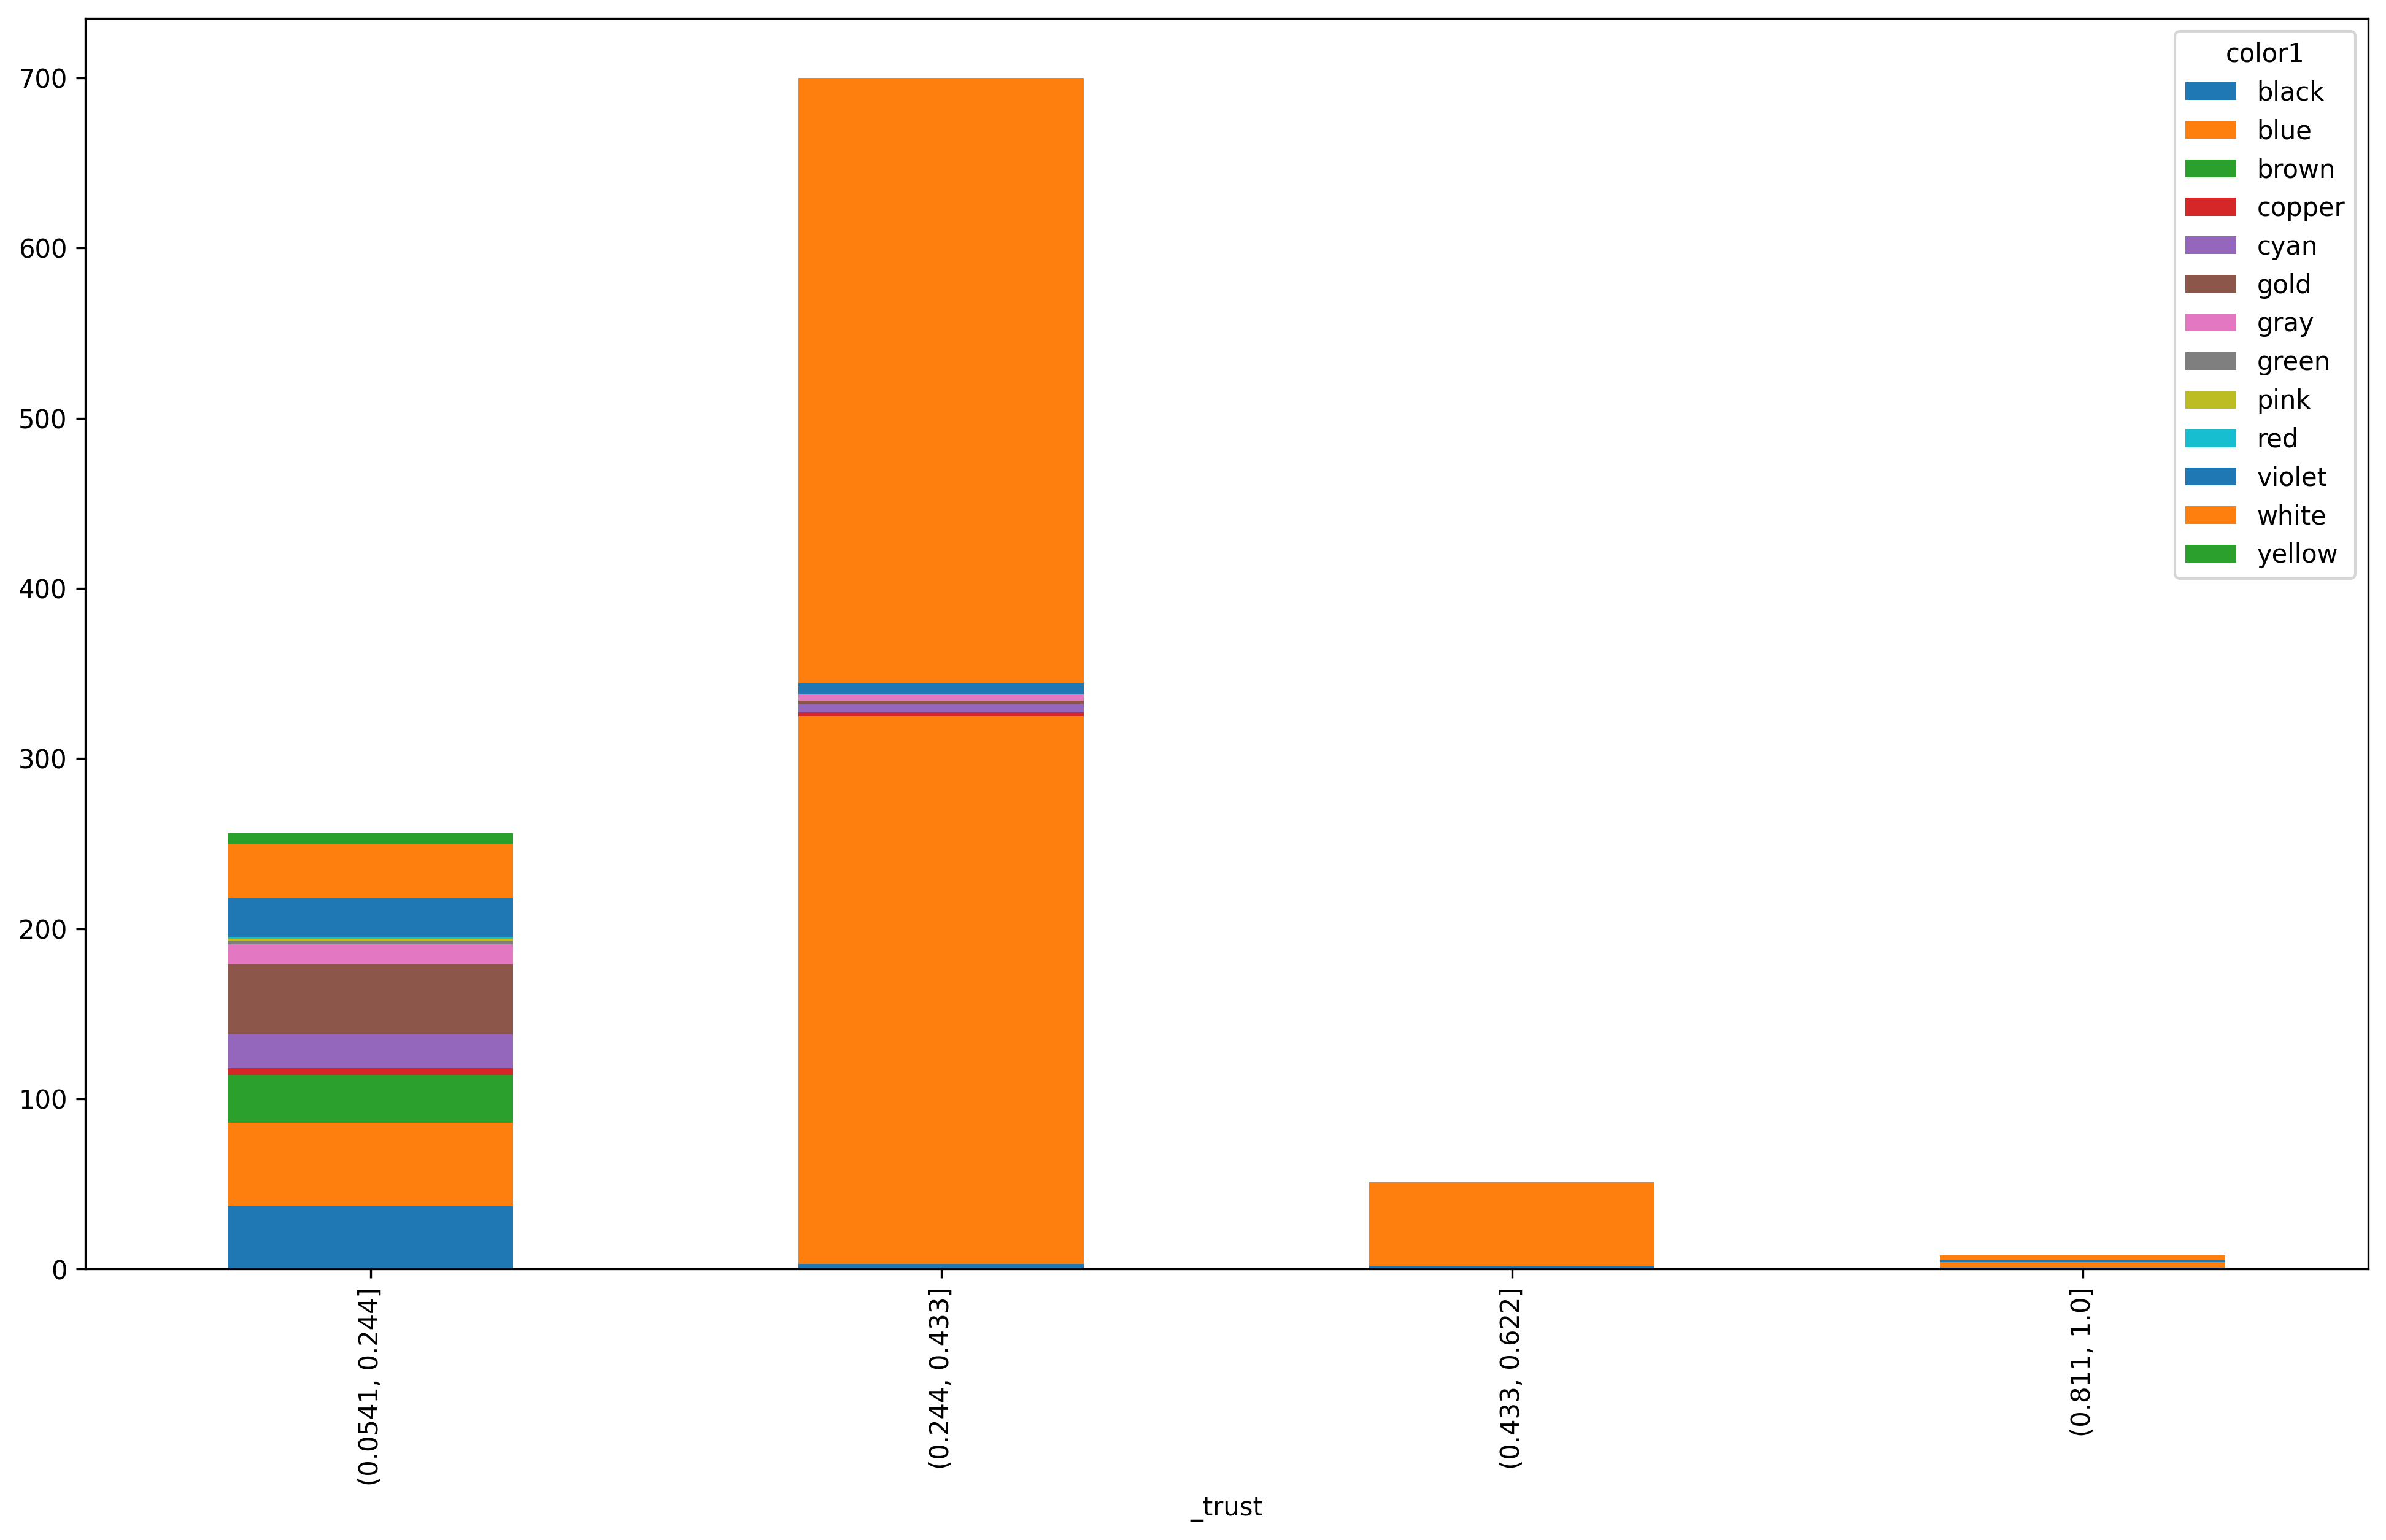

In [12]:
trust_table = pd.crosstab(pd.cut(df['_trust'], bins = 5), df['color1'])
trust_table.plot(kind = 'bar', stacked = True)

plt.show()

After analyzing the data by trust, you could come up with an insight about the correlation of trust and color selection.